# Imports

## Import des libraries

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split
from sklearn.model_selection import train_test_split

# Models classifications 
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics evaluations
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

# Import des données

In [296]:
df = pd.read_csv("data/df_enc.csv")

In [297]:
df

,year,bank_account,location_type,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,cellphone_enc
0,2018,1,0,3,24,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0.183797
1,2018,0,0,5,70,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0.017133
2,2018,1,1,5,26,1,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0.183797
3,2018,0,0,5,34,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0.183797
4,2018,0,1,8,26,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0.017133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,0,0,4,48,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0.183797
23520,2018,0,0,2,27,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0.183797
23521,2018,0,0,5,27,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0.183797
23522,2018,0,1,7,30,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.183797


In [298]:
df_sample = df.sample(n = 5000, random_state = 42)

# Logistic regression

In [299]:
X = df_sample.drop(["bank_account"], axis = 1)
y = df_sample["bank_account"]

In [300]:
#Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

# Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))

#Train the model
model = LogisticRegression()
model.fit(X_train_rus, y_train_rus) #Training the model

#Test the model
predictions = model.predict(X_test)

#Check precision, recall, f1-score
print( classification_report(y_test, predictions))

[(0, 536), (1, 536)]
              precision    recall  f1-score   support

           0       0.94      0.80      0.87       844
           1       0.41      0.74      0.53       156

    accuracy                           0.79      1000
   macro avg       0.68      0.77      0.70      1000
weighted avg       0.86      0.79      0.82      1000



/home/selmane/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


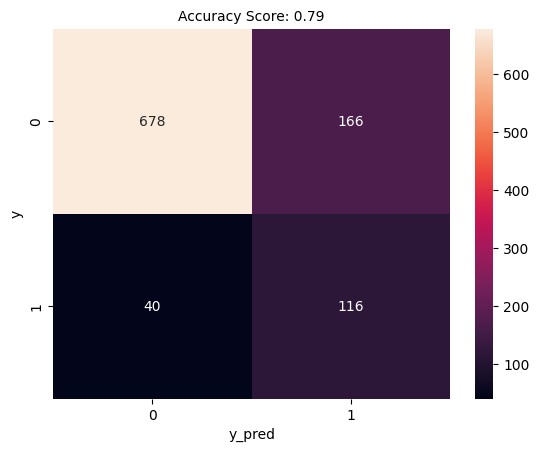

In [301]:
# Confusion Matrix
def plot_confusion_matrix(y, y_pred):
     acc = round(accuracy_score(y, y_pred), 2)
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.title('Accuracy Score: {0}'.format(acc), size=10)
     plt.show()

plot_confusion_matrix(y_test, predictions)

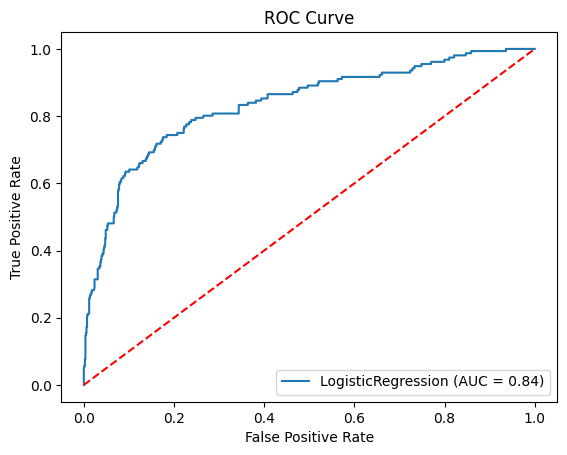

AUC score: 0.8353878053226395


In [302]:
# ROC Curve
plot_roc_curve(model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

# AUC to have diabetes
y_prob = model.predict_proba(X_test)
print("AUC score:",roc_auc_score(y_test, y_prob[:, 1]))

# Decision tree

In [303]:
#Split the data into 80% training and 20% testing
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.2, random_state=42)

# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus_3, y_train_rus_3= rus.fit_resample(X_train_3, y_train_3)

# Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Fit dt to the training set
clf.fit(X_train_rus_3, y_train_rus_3)

# Predict test set labels
y_pred_dt = clf.predict(X_test_3)

#Check precision, recall, f1-score
print( classification_report(y_test_3, y_pred_dt))

[(0, 536), (1, 536)]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       844
           1       0.31      0.68      0.43       156

    accuracy                           0.71      1000
   macro avg       0.62      0.70      0.62      1000
weighted avg       0.83      0.71      0.75      1000



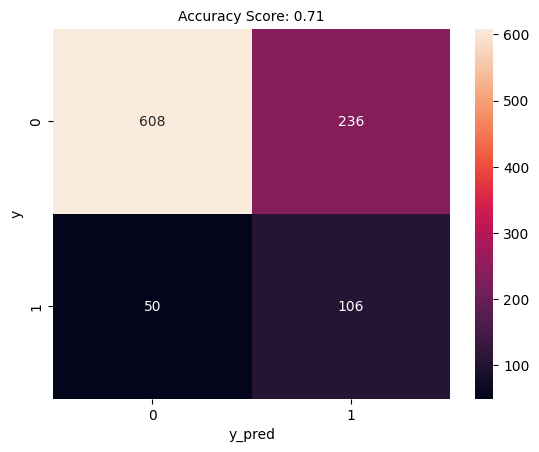

In [304]:
plot_confusion_matrix(y_test_3, y_pred_dt)

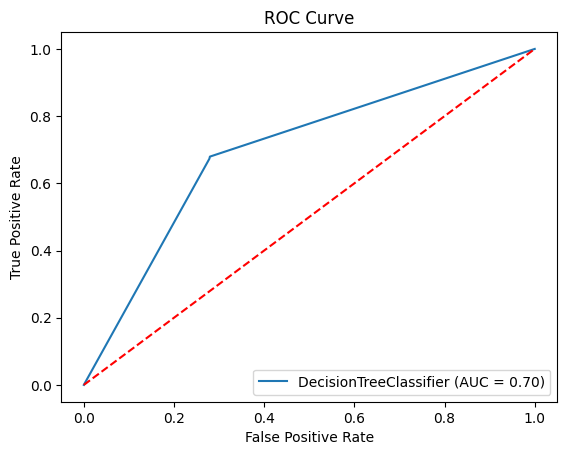

AUC score: 0.6994394823186293


In [305]:
# ROC Curve
plot_roc_curve(clf, X_test_3, y_test_3)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

# AUC to have diabetes
y_prob = clf.predict_proba(X_test_3)
print("AUC score:",roc_auc_score(y_test_3, y_prob[:, 1]))

# Naive Bayes

In [306]:
from sklearn.naive_bayes import GaussianNB

#Split the data into 80% training and 20% testing
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size=0.2, random_state=42)

# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus_4, y_train_rus_4= rus.fit_resample(X_train, y_train)

# Check the number of records after under sampling
print(sorted(Counter(y_train_rus_4).items()))

gnb = GaussianNB()
gnb.fit(X_train_rus_4, y_train_rus_4)
y_pred_gnb = gnb.predict(X_test_4)

#Check precision, recall, f1-score
print( classification_report(y_test_4, y_pred_gnb))

[(0, 536), (1, 536)]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       844
           1       0.49      0.69      0.57       156

    accuracy                           0.84      1000
   macro avg       0.71      0.78      0.74      1000
weighted avg       0.87      0.84      0.85      1000



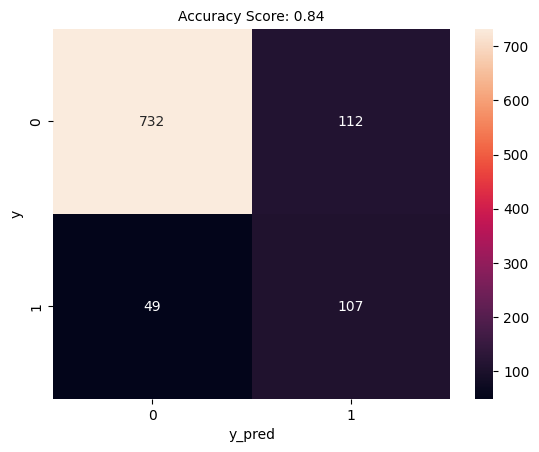

In [307]:
plot_confusion_matrix(y_test_4, y_pred_gnb)

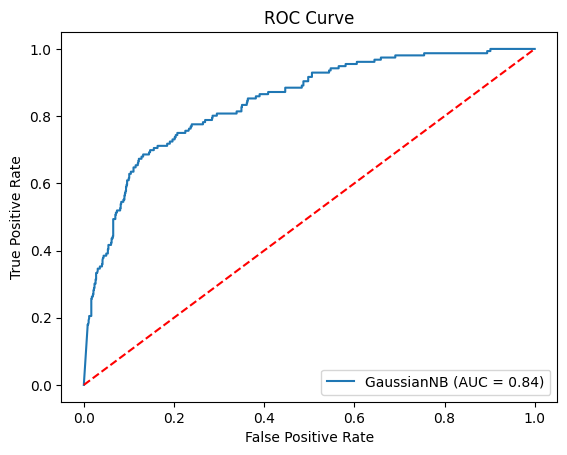

AUC score: 0.8439132944464699


In [308]:
# ROC Curve
plot_roc_curve(gnb, X_test_4, y_test_4)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

# AUC to have diabetes
y_prob = gnb.predict_proba(X_test_4)
print("AUC score:",roc_auc_score(y_test_4, y_prob[:, 1]))